<a href="https://colab.research.google.com/github/samuel-oluwemimo/programming_pytorch_for_deep_learning/blob/main/R_V01_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import torch.utils.data as data
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = T.Compose([
    T.Resize(28),
    T.ToTensor(),
    T.Normalize([0.5],[0.5])
])

In [3]:
train_set = torchvision.datasets.FashionMNIST(root='.', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='.', train=False, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.89MB/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.8MB/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [4]:
print(test_set[0])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

In [5]:
print(test_set.class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [6]:
txt_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

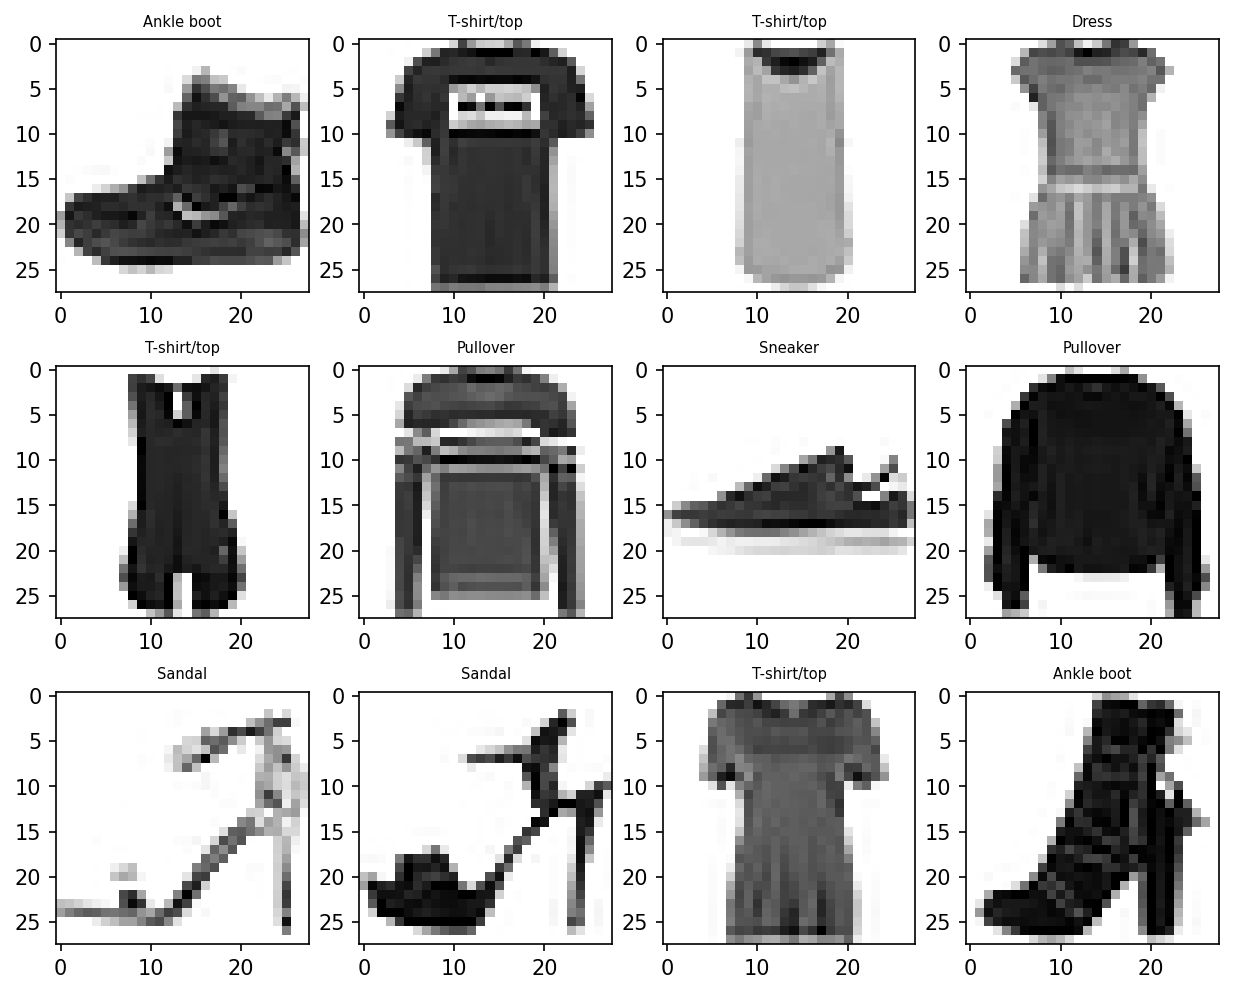

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=150, figsize=(10,8))
for i in range(12):
  ax = plt.subplot(3,4, i+1)
  img = train_set[i][0]
  img = img.reshape(28,28)
  plt.imshow(img, cmap='binary')
  plt.title(txt_labels[train_set[i][1]], fontsize=7)
plt.show()


In [8]:
len(train_set)

60000

In [9]:
torch.manual_seed(42)
batch_size = 64
train_set, val_set = data.random_split(train_set, [50000,10000])
train_dataloader = data.DataLoader(train_set, shuffle=True, batch_size=batch_size)
val_dataloader = data.DataLoader(val_set, shuffle=True, batch_size=batch_size)
test_dataloader = data.DataLoader(test_set, shuffle=True, batch_size=batch_size)

In [10]:
print(len(train_set), len(val_set))

50000 10000


In [11]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.fn1 = nn.Linear(28*28, 256)
    self.fn2 = nn.Linear(256, 128)
    self.fn3 = nn.Linear(128, 64)
    self.fn4 = nn.Linear(64, 10)
    self.Dropout = nn.Dropout(p=0.20)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fn1(x))
    x = F.relu(self.fn2(x))
    x = F.relu(self.fn3(x))
    x = self.Dropout(x)
    x = self.fn4(x)
    x = F.softmax(x,dim=1)
    return x

model = Model()

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [15]:
def model_train(model, train_dataloader, val_dataloader, optimizer, loss_fn, epochs=0):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_idx, (input, labels) in enumerate(train_dataloader):
            optimizer.zero_grad()
            output = model(input)
            loss = loss_fn(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(output, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss /= len(train_dataloader)
        train_accuracy = 100 * correct_train / total_train

        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_idx, (input, labels) in enumerate(val_dataloader):
                output = model(input)
                loss = loss_fn(output, labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(output, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_loss /= len(val_dataloader)
        val_accuracy = 100 * correct_val / total_val

        print(f'Epoch: {epoch}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')


In [16]:
model_train(model, train_dataloader, val_dataloader, optimizer, loss_fn, epochs=50)

Epoch: 0, Training Loss: 1.6110, Training Accuracy: 84.99%, Validation Loss: 1.6139, Validation Accuracy: 84.52%
Epoch: 1, Training Loss: 1.6079, Training Accuracy: 85.32%, Validation Loss: 1.6189, Validation Accuracy: 84.23%
Epoch: 2, Training Loss: 1.6117, Training Accuracy: 84.92%, Validation Loss: 1.6134, Validation Accuracy: 84.70%
Epoch: 3, Training Loss: 1.6094, Training Accuracy: 85.12%, Validation Loss: 1.6147, Validation Accuracy: 84.56%
Epoch: 4, Training Loss: 1.6067, Training Accuracy: 85.39%, Validation Loss: 1.6176, Validation Accuracy: 84.31%
Epoch: 5, Training Loss: 1.6064, Training Accuracy: 85.43%, Validation Loss: 1.6155, Validation Accuracy: 84.49%
Epoch: 6, Training Loss: 1.6054, Training Accuracy: 85.54%, Validation Loss: 1.6020, Validation Accuracy: 85.84%
Epoch: 7, Training Loss: 1.6027, Training Accuracy: 85.81%, Validation Loss: 1.6092, Validation Accuracy: 85.11%
Epoch: 8, Training Loss: 1.6055, Training Accuracy: 85.56%, Validation Loss: 1.6178, Validation 

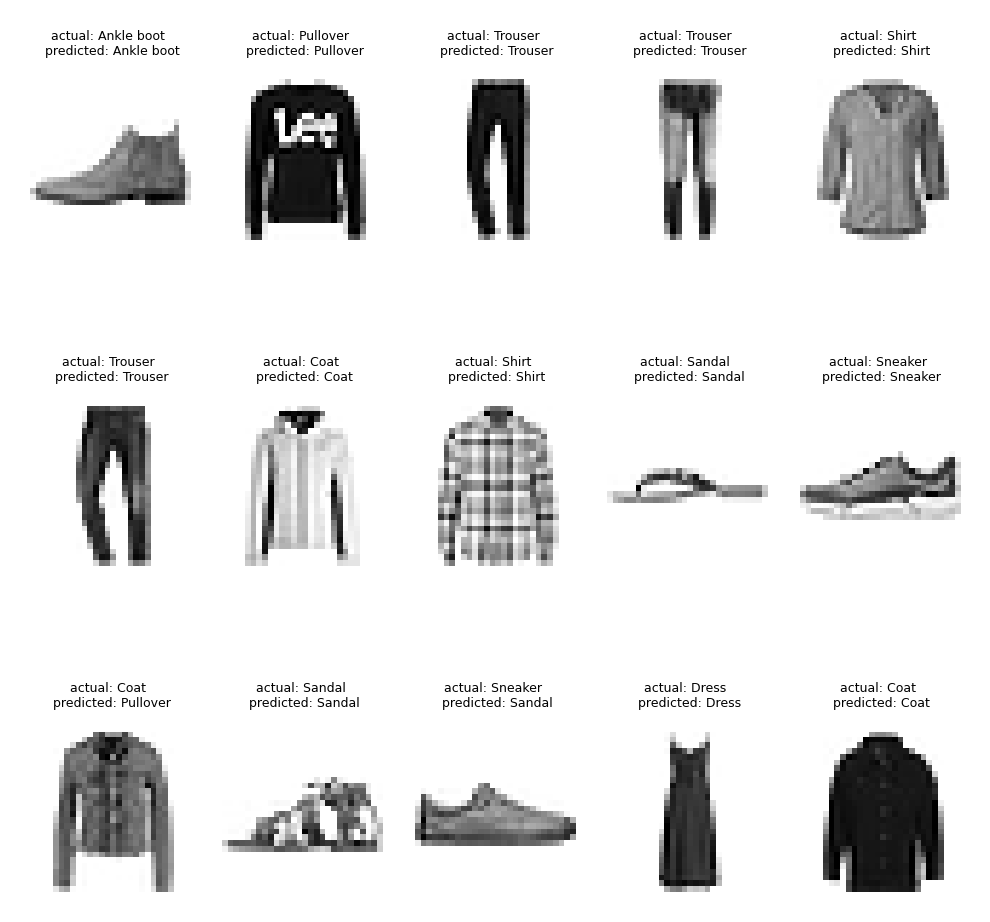

In [39]:
fig = plt.figure(dpi=300,figsize=(4,4))
for i in range(15):
  ax = plt.subplot(3,5, i+1)
  img = test_set[i][0]
  pred = model(img)
  img = img.resize(28,28)
  _, pred = torch.max(pred, 1)
  plt.imshow(img, cmap='binary')
  plt.title(f'actual: {txt_labels[test_set[i][1]]} \n predicted: {txt_labels[pred]}', fontsize=3)
  plt.axis('off')
plt.show()

In [40]:
torch.save(model.state_dict(), '/content/FashionMistModel.pth')